# Understanding Matplotlib

Materials adapted from the RealPython tutorial [Python Plotting with Matplotlib](https://realpython.com/python-matplotlib-guide/)

**Table of Content**

1. [Setting up matplotlib](#sec1)
2. [Creating one plot and changing its style](#sec2)
3. [Creating subplots](#sec3)
4. [Real-data example: California Housing](#sec4)

<a id="sec1"></a>
## 1. Setting up matplotlib

**Importing what we need**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444) # initializes our random number generator

**The simplest plot**

In [ ]:
plt.plot([4, 5, 6])

**The top object: `figure`**

In [ ]:
fig, ax = plt.subplots()
print(type(fig))

**Use object hierarchy to get a nested element**

In [4]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

<a id="sec2"></a>
## 2. Creating one plot

Creating and decorating a single plot.

In [5]:
# Generate data
import numpy as np
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

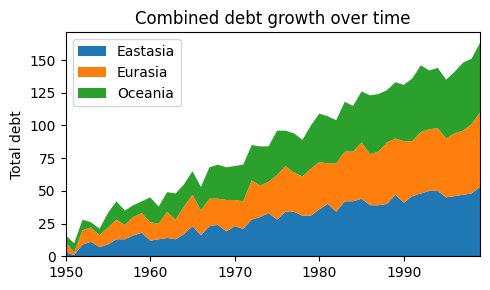

In [6]:
# Generate plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1]) # range of values
fig.tight_layout() # clean whitespace

**Changing the plot style**

The default matplotlib style is not that appealing. It is possible to change the appearance of the entire plot, by setting the style of the image. Each style has its own color scheme, font family and font size, background color, grids, etc. Here are some examples of famous styles:

In [7]:
# The famous data & statisics website 
plt.style.use('fivethirtyeight')

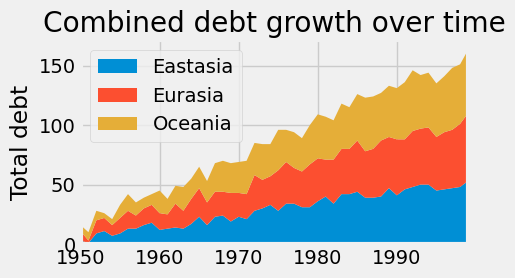

In [8]:
# Generate plot
def generateOnePlot():
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
    ax.set_title('Combined debt growth over time')
    ax.legend(loc='upper left')
    ax.set_ylabel('Total debt')
    ax.set_xlim(xmin=yrs[0], xmax=yrs[-1]) # range of values
    fig.tight_layout() # clean whitespace

generateOnePlot()

In [9]:
# The famouos R library for plotting, ggplot
plt.style.use('ggplot')

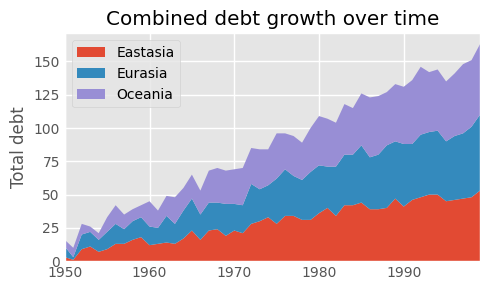

In [10]:
generateOnePlot()

Matplotlib has many more styles, you can find them as follows:

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Try out some of the styles below**

Replace the value of "bmh" to any of the values shown above, and rerun the cell.

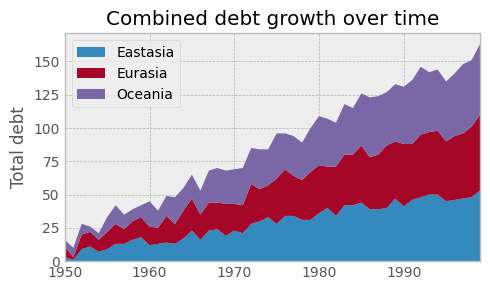

In [12]:
plt.style.use('bmh') 
generateOnePlot()

<a id="sec3"></a>
## 3. Creating subplots

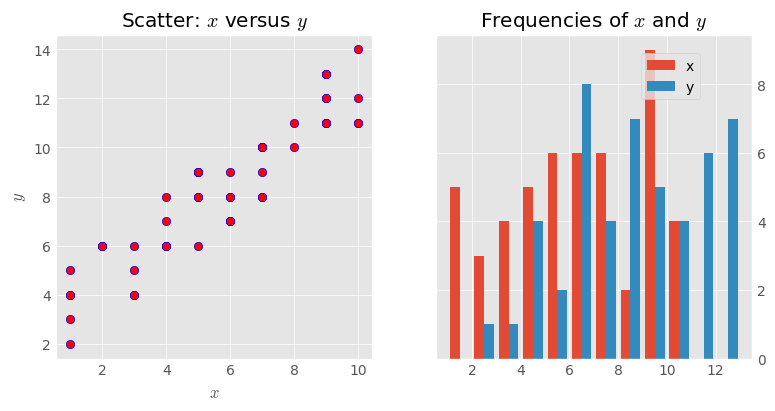

In [13]:
plt.style.use('ggplot') 


# Generate the data
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

# Create the first subplot as a scatterplot
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$') # Use TeX style, by enclosing value in the dollar signs to italize it
ax1.set_ylabel('$y$')

# Create the second subplot as a scatterplot
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

Let's create a 2x2 grid of subplots:

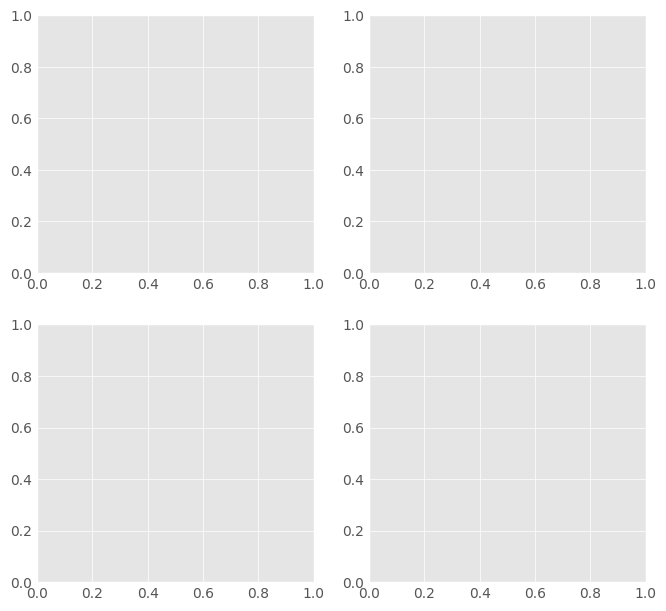

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

What is the value of ax at the moment?

In [15]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [16]:
type(ax)

numpy.ndarray

It's a numpy array. To access each axes we would have to do double indexing, such as:

In [17]:
ax[1][1]

<Axes: >

But, we can also **flatten** the array, so that it becomes a list, which is easier to index:

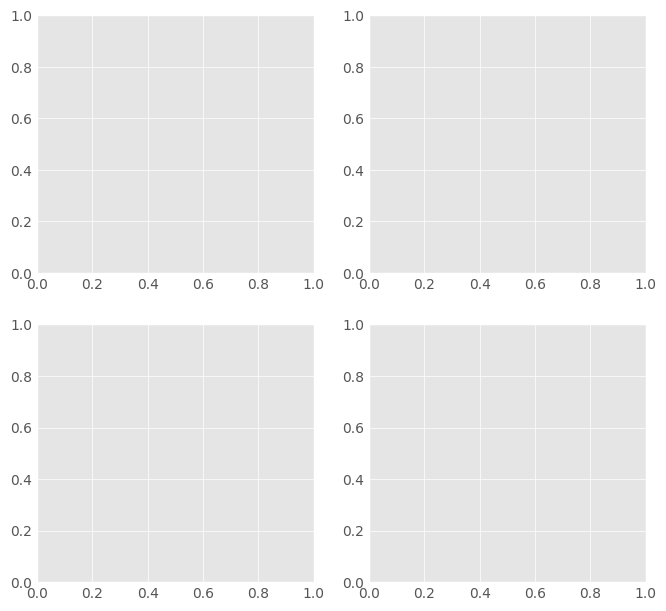

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

<a id="sec4"></a>
## 4. Read data example: California Housing

In [19]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

How big is the array housing?

In [20]:
housing.shape

(20640, 9)

In [21]:
housing[0]

array([-1.2223e+02,  3.7880e+01,  4.1000e+01,  8.8000e+02,  1.2900e+02,
        3.2200e+02,  1.2600e+02,  8.3252e+00,  4.5260e+05])

Let's create a dataframe, just to see the data:

In [ ]:
import pandas as pd

In [23]:
df = pd.DataFrame(housing)
df.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Get the response variable (or the dependent variable), which corresponds to the "area's average home value".
This is the last column:

In [24]:
y = housing[:, -1]

Let's name two other variables:

`pop` - area's population  
`age` - the average house age

In [25]:
pop, age = housing[:, [4, 7]].T # transpose from vertical column to horizontal row

**Helper function for the inplot title**

In [26]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

**Create a subgrid and plot the data**

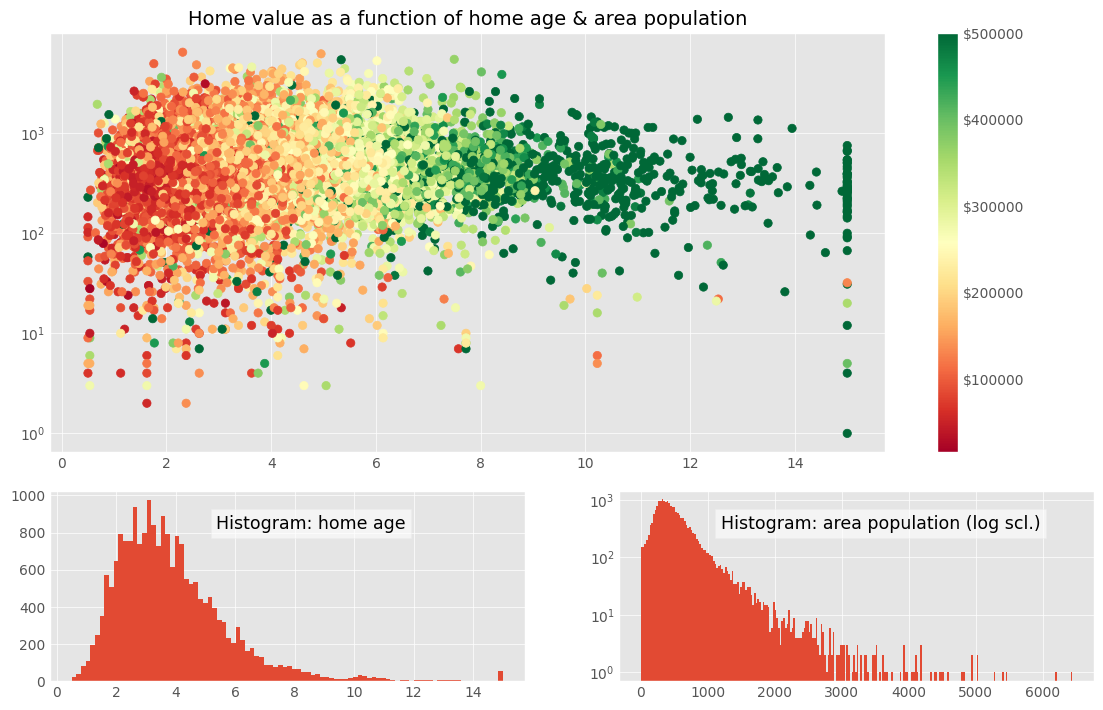

In [27]:
# Create the grid
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))


# Plot data in each axes of the grid
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

plt.savefig("california-housing.png") # make sure to save it
plt.show()